## SI 670 Applied Machine Learning, Week 2:  Basic supervised learning concepts (Due Thursday Sept. 23 11:59pm)

For this assignment, you will be practicing various machine learning operations in scikit-learn related to linear regression, polynomial feature expansion, underfitting/overfitting, and cross-validation.

Each question is worth 20 points, for a total of 80 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file to the Canvas site - IMPORTANT: please name your submitted file si670-hw2-youruniqname.ipynb and be sure to put your name at the top of your notebook file.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates.

### Put your name here: Cameron Milne
### Put your uniquename here: ccmilne

### Preliminary
First, run the following block to set up the variables needed for later sections. It generates training and test data that we're going to use to fit a non-linear function (as opposed to the traditional linear regression problems you may have seen in the past).

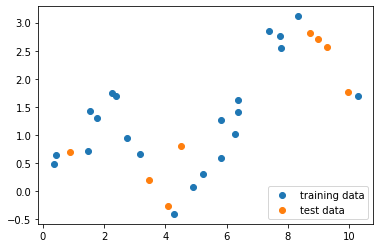

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 30
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 4 + np.random.randn(n) / 3

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
part1_scatter()  # let's plot the training and test data for the upcoming questions.

### Question 1 (20 points)

Write a function that fits a polynomial curve to the data, by using a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Recall that we use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model to those extended features). For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="si670f21_hw_2_q1_image.png" style="width: 600px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [2]:
def answer_one():
    '''
    
    '''
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    #From the preliminary chunk
    np.random.seed(0)
    n = 30
    x = np.linspace(0, 10, n) + np.random.randn(n) / 5
    y = np.sin(x) + x / 4 + np.random.randn(n) / 3
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
    
    #instantiates a numpy array of shape (4, 100)
    res = np.zeros([4, 100]) 
    #linspace: return evenly spaced numbers over a specified interval
    #reshape(-1, 1) converts the predictions to a 2 dimensional array in order to fit_transform
    #This prediction range creates all of the values that compose the trend line created for each curve
    prediction_range = np.linspace(0, 10, 100).reshape(-1, 1) 
    
    counter = 0
    
    for i in [1,3,6,9]:
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_predict_poly = poly.fit_transform(prediction_range)
        linreg = LinearRegression()
        linreg.fit(X_train_poly, y_train)
        temp = linreg.predict(X_predict_poly).reshape(1, -1)
        res[counter, :] = temp #access all rows of the count (i) of the results array and replace with temp
        counter = counter + 1
        
    res = res
    
    return np.array(res)

answer_one().shape

(4, 100)

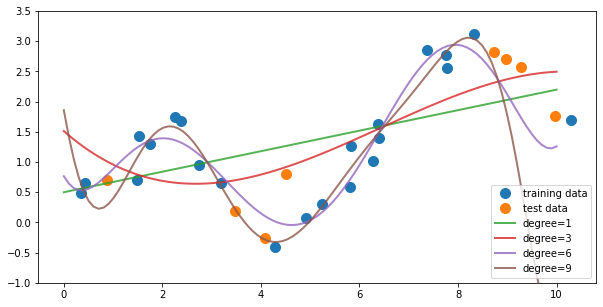

In [3]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,3.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2 (20 points)

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

Based on the $R^2$ scores above (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Note: there may be multiple correct solutions to this question.

(Hint: you can plot the r2_train and r2_test vs the degree to investigate underfitting/overfitting.)

*This function should return one tuple of numpy arrays `(r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)`, where both `r2_train` and `r2_test` should have shape `(10,)`, and `Underfitting, Good_Generalization, Overfitting` should be three lists of int partitioning 0-9.*

In [4]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np
    
    np.random.seed(0)
    n = 30
    x = np.linspace(0, 10, n) + np.random.randn(n) / 5
    y = np.sin(x) + x / 4 + np.random.randn(n) / 3

    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
    
#     print(X_train.shape) #(22,)
#     print(X_test.shape) #(8,)
#     print(y_train.shape) #(22,)
#     print(y_test.shape) #(8,)
    
    r2_train = []
    r2_test = []
    Underfitting = []
    Good_Generalization = []
    Overfitting = []
    
    for i in range(10):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
        
        linreg = LinearRegression().fit(X_train_poly, y_train)
        y_pred = linreg.predict(X_train_poly)
        R2_test = linreg.score(X_test_poly, y_test)
        R2_train = linreg.score(X_train_poly, y_train)
        r2_train.append(R2_train)
        r2_test.append(R2_test)
        
        difference = R2_test - R2_train 

        #Overfitting: Training performs better than Testing
        if difference < 0 and abs(difference) > 0.2:
            Overfitting.append(i)
        
        #Underfitting: Testing performs better than Training
        elif difference > 0 and abs(difference) > 0.2:
            Underfitting.append(i)
        else:
            Good_Generalization.append(i)
            
    r2_train = np.array(r2_train)
    r2_test = np.array(r2_test)

    return (r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)

answer_two()

(array([0.        , 0.26439755, 0.32742358, 0.37220126, 0.86736045,
        0.87144785, 0.91335744, 0.93652344, 0.93840679, 0.94068506]),
 array([-0.01063969,  0.54040848,  0.64266551,  0.76381091,  0.65922591,
         0.75737122,  0.77130324,  0.38779953,  0.81042063, -0.59293201]),
 [1, 2, 3],
 [0, 5, 6, 8],
 [4, 7, 9])

The lists with the Degree numbers have been assigned to their Underfitting (1, 2, 3), Good_Generalization (0, 5, 6, 8), and Overfitting (4, 7, 9) lists above. Overfitting occurs when the training data performs better than the test data, and underfitting is the opposite. In order to establish what was a good generalization, I determined a cutoff difference of absolute value 20%. So, any difference between a training and data score that was less than 0.2 was judged as a good generalization. The one concern with this system is that a polynomial feature expansion with 0 degrees is considered a good generalization. This is likely wrong because the testing data is a negative value. 

### Question 3 (20 points)

This question asks you to explore the relationship between the distribution of cross-validation scores vs the data size. 

Please use a 'for' loop to repeat the following steps with `n` varying from `[100, 500, 1000, 5000, 10000]`:
1. Generate synthetic data `(X_F1, y_F1)` using `make_friedman1` with `n_samples=n, n_features=7, random_state=0`;
2. Create a `LinearRegression` model
3. Apply `cross_val_score` to the model and generated data and use three-fold cross-validation.
4. Calculate the mean and std of the returned `cv_scores` across the 3 cross-validation folds.

Store the mean and std of the `cv_scores` in lists `cv_scores_mean` and `cv_scores_std` respectively. Do you see the std increasing or decreasing? And why? 

*This function should return a tuple of two lists `(cv_scores_mean, cv_scores_std)`, where both of them should have length 5.*


In [5]:
def answer_three():
    from sklearn.datasets import make_friedman1
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    
    cv_scores_mean = []
    cv_scores_std = []

    for n in [100, 500, 1000, 5000, 10000]:
        X_F1, y_F1 = make_friedman1(n_samples=n, n_features=7, random_state=0)
        linreg = LinearRegression().fit(X_F1, y_F1)
        cv = cross_val_score(linreg, X_F1, y_F1, cv=3)
        cv_scores_mean.append(cv.mean())
        cv_scores_std.append(cv.std())
        
    return (cv_scores_mean, cv_scores_std)

answer_three()

([0.6018299574452851,
  0.6992854711790496,
  0.7581670531880474,
  0.7601055644422733,
  0.7630386688459639],
 [0.12627903848248165,
  0.02442384456645555,
  0.03206662433801185,
  0.008641386533462664,
  0.00784656708111215])

The standard deviation appears to decrease as sample size increases. This is because the sample size is in the denominator of the standard deviations of the sampling distributions. In other words, the denominator is constant and the numerator continues to increase with sample size, driving the standard deviation down. 

### Question 4 (20 points)

From Question 1 and 2 we have seen that we need to be careful when selecting the `degree` parameter of the polynomial feature expansion. These kind of parameters that control the complexity or other properties of the model itself are usually called "hyper-parameters" in machine learning. In this question, we will see how to make a good choice of the hyper-parameter(s). And when the dataset is small, cross validation can help us make a more reliable choice for the optimal hyper-parameters. 

We have provided most of the code below for a function that finds the best polynomial degree. You need to fill in the code sections indicated with %%% to create a working function. 



In [6]:
def answer_four():
    import numpy as np
    from sklearn.datasets import make_friedman3
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import cross_val_score

    # generate dta
    X_F3_train, y_F3_train = make_friedman3(n_samples=100, random_state=0)  # training set
    X_F3_test, y_F3_test = make_friedman3(n_samples=500, random_state=1)  # hold-out test set

    r2_cv = []
    r2_one_split = []
    for d in range(1,6):
        
        # %%% Your code: transform `X_F3_train` to `X_F3_train_trans` using `PolynomialFeatures` with `degree=d`\
        poly = PolynomialFeatures(degree=d)
        X_F3_train_trans = poly.fit_transform(X_F3_train)

        # train and evaluate with one split
        X_train, X_valid, y_train, y_valid = train_test_split(X_F3_train_trans, y_F3_train, random_state=0, test_size=0.1)
        linreg = LinearRegression().fit(X_train, y_train)
        r2_one_split.append(linreg.score(X_valid, y_valid))

        # train and evaluate with cross validation
        linreg = LinearRegression()
        # %%% Your code: get `cv_scores` by applying `cross_val_score` on `linreg, X_F3_train_trans, y_F3_train` with `cv=10`        
        cv_scores = cross_val_score(linreg, X_F3_train_trans, y_F3_train, cv=10)
        r2_cv.append(np.mean(cv_scores))

    # evalutate on the hold-out test set
    d_one_split = np.argmax(r2_one_split)+1  # get the best degree on the one-split validation set
    poly = PolynomialFeatures(degree=d_one_split)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_one_split = linreg.score(X_F3_test_trans, y_F3_test)
    print('One split:\tDegree {}, R-squared score {:.3f}'
         .format(d_one_split, linreg.score(X_F3_test_trans, y_F3_test)))

    d_cv = np.argmax(r2_cv)+1  # get the best degree on the cross validation set
    poly = PolynomialFeatures(degree=d_cv)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_cv = linreg.score(X_F3_test_trans, y_F3_test)
    print('Cross Valid:\tDegree {}, R-squared score {:.3f}'
         .format(d_cv, linreg.score(X_F3_test_trans, y_F3_test)))
    
    return (d_one_split, score_one_split, d_cv, score_cv)

answer_four()

One split:	Degree 3, R-squared score 0.239
Cross Valid:	Degree 2, R-squared score 0.751


(3, 0.2392344003957645, 2, 0.7508642440811122)

In [7]:
## Bonus(3 points): 
### For answers handling d = 0 case right, we give an extra 3 points. ###

def answer_four():
    import numpy as np
    from sklearn.datasets import make_friedman3
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import cross_val_score

    # generate dta
    X_F3_train, y_F3_train = make_friedman3(n_samples=100, random_state=0)  # training set
    X_F3_test, y_F3_test = make_friedman3(n_samples=500, random_state=1)  # hold-out test set

    r2_cv = []
    r2_one_split = []
    for d in range(6):
        
        if d == 0:
            X_F3_train_trans = PolynomialFeatures(include_bias=False).fit_transform(X_F3_train)
        
        else:
            # %%% Your code: transform `X_F3_train` to `X_F3_train_trans` using `PolynomialFeatures` with `degree=d`
            poly = PolynomialFeatures(degree=d, include_bias=True)
            X_F3_train_trans = poly.fit_transform(X_F3_train)        

            # train and evaluate with one split
            X_train, X_valid, y_train, y_valid = train_test_split(X_F3_train_trans, y_F3_train, random_state=0, test_size=0.1)
            linreg = LinearRegression().fit(X_train, y_train)
            r2_one_split.append(linreg.score(X_valid, y_valid))

            # train and evaluate with cross validation
            linreg = LinearRegression()
            # %%% Your code: get `cv_scores` by applying `cross_val_score` on `linreg, X_F3_train_trans, y_F3_train` with `cv=10`
            cv_scores = cross_val_score(linreg, X_F3_train_trans, y_F3_train, cv=10)
            r2_cv.append(np.mean(cv_scores))

    # evalutate on the hold-out test set
    d_one_split = np.argmax(r2_one_split)  # get the best degree on the one-split validation set
    poly = PolynomialFeatures(degree=d_one_split)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_one_split = linreg.score(X_F3_test_trans, y_F3_test)
    print('One split:\tDegree {}, R-squared score {:.3f}'
         .format(d_one_split, linreg.score(X_F3_test_trans, y_F3_test)))

    d_cv = np.argmax(r2_cv)  # get the best degree on the cross validation set
    poly = PolynomialFeatures(degree=d_cv)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_cv = linreg.score(X_F3_test_trans, y_F3_test)
    print('Cross Valid:\tDegree {}, R-squared score {:.3f}'
         .format(d_cv, linreg.score(X_F3_test_trans, y_F3_test)))


    return (d_one_split, score_one_split, d_cv, score_cv)
            

answer_four()

One split:	Degree 2, R-squared score 0.751
Cross Valid:	Degree 1, R-squared score 0.528


(2, 0.7508642440811122, 1, 0.5279852230419815)